In [1]:
import pandas as pd 

pizza={'diameter':[6,8,10,14,18],
      'harga':[7,9,13,17.5,18]}

pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


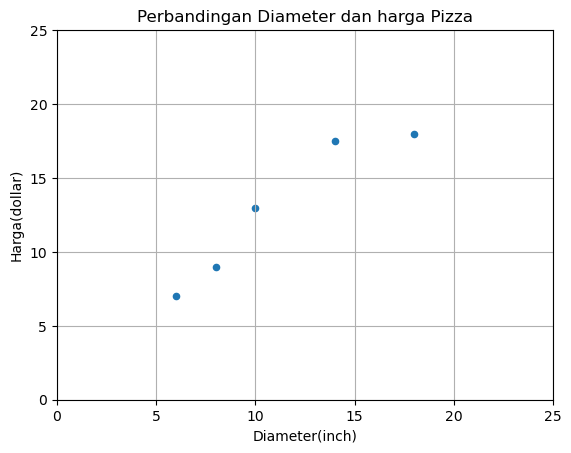

In [2]:
import matplotlib.pyplot as plt

pizza_df.plot(kind='scatter',x='diameter',y='harga')

plt.title('Perbandingan Diameter dan harga Pizza')
plt.xlabel('Diameter(inch)')
plt.ylabel('Harga(dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

## Penyesuaian data set

In [3]:
import numpy as np

x=np.array(pizza_df['diameter'])
y=np.array(pizza_df['harga'])

print('X :',x)
print('Y :',y)

X : [ 6  8 10 14 18]
Y : [ 7.   9.  13.  17.5 18. ]


In [4]:
x=x.reshape(-1,1)
x.shape

(5, 1)

In [5]:
x

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]], dtype=int64)

### Training simple linear regression Model

In [6]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x,y)

LinearRegression()

### Visualisasi Simple Linear Regression model

In [7]:
x_vis=np.array([0, 25]).reshape(-1, 1)
y_vis=model.predict(x_vis)

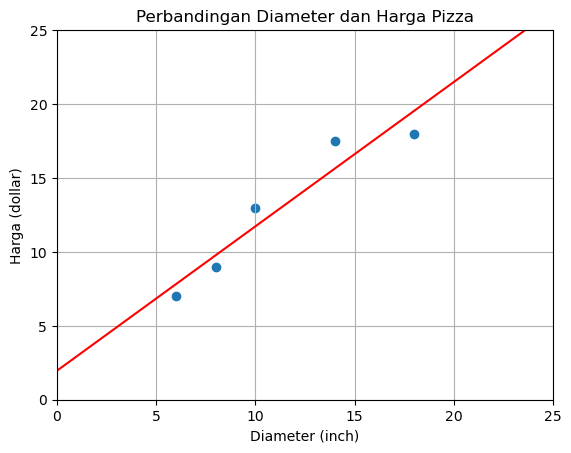

In [8]:
plt.scatter(x, y)
plt.plot(x_vis, y_vis, '-r')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

In [13]:
print('intercept :',model.intercept_)
print('slope :',model.coef_)

intercept : 1.965517241379315
slope : [0.9762931]


### Mencari nilai Slope

In [9]:
print('x :',x)
print('flatten :',x.flatten())
print('y :',y)

x : [[ 6]
 [ 8]
 [10]
 [14]
 [18]]
flatten : [ 6  8 10 14 18]
y : [ 7.   9.  13.  17.5 18. ]


### Variance

In [10]:
variance_x=np.var(x.flatten(),ddof=1)

print('Variance :', variance_x)

Variance : 23.2


### Covariance

In [12]:
np.cov(x.flatten(),y)

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [14]:
covariance_xy =np.cov(x.flatten(),y)[0][1]
print('covariance :',covariance_xy)

covariance : 22.650000000000002


### Slope

In [15]:
slope =covariance_xy / variance_x

print(slope)

0.976293103448276


### Mencari nilai intercept

In [16]:
intercept =np.mean(y)-slope*np.mean(x)
print('intercept: ',intercept)

intercept:  1.9655172413793096


### Prediksi harga Pizza

In [17]:
diameter_pizza=np.array([12, 20, 23]).reshape(-1, 1)
diameter_pizza

array([[12],
       [20],
       [23]])

In [18]:
prediksi_harga=model.predict(diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

In [19]:
for dmtr,hrg in zip(diameter_pizza, prediksi_harga):
    print('Diameter',dmtr,' Prediksi harga: 'hrg)

Diameter [12]  Prediksi harga:  13.681034482758621
Diameter [20]  Prediksi harga:  21.491379310344826
Diameter [23]  Prediksi harga:  24.42025862068965


## Evaluasi Simple Linear Regression

### Training and Testting

In [23]:
x_train=np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train=np.array([7, 9, 13, 17.5, 18])

x_test=np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test=np.array([11, 8.5, 15, 18, 11])

### Training SLR model

In [24]:
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [25]:
from sklearn.metrics import r2_score

y_pred=model.predict(x_test)

r_squared =r2_score(y_test,y_pred)

print('R- Squared :',r_squared)

R- Squared : 0.6620052929422553


### Mencari nilai R-Squared residual

In [28]:
ss_res =sum([(y_i - model.predict(x_i.reshape(-1, 1))[0])**2
             for x_i, y_i in zip(x_test, y_test)])
             
print ('ss_res: ',ss_res)

ss_res:  19.1980993608799


### SS total

In [30]:
mean_y=np.mean(y_test)
ss_tot=sum([(y_i-mean_y)**2 for y_i in y_test])

print(ss_tot)

56.8


### R2

In [31]:
r_squared=1-(ss_res /ss_tot)

print('R-squared :',r_squared)

R-squared : 0.6620052929422553
